<a href="https://colab.research.google.com/github/jonathanl1220/Anime_Classifier/blob/main/Char_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Mount


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
# from keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
import itertools
#import imutils
import datetime
import tensorboard
import seaborn as sns
%load_ext tensorboard


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
cd 'MyDrive/MyDrive/cap_img'

/content/MyDrive/MyDrive/cap_img


# Data Augmentation and Image Generator

In [ ]:
im = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
classes=['Edward', 'Faye', 'Jet', 'Spike', 'Vicious', 'aizen', 'al', 'armin','asta','beast', 'bradley', 'cell', 'ed', 'erin', 'erza', 'freiza', 'gluttony', 'goku', 'gray', 'grimjow', 'ichigo','ino','julius', 'katakuri', 'kenpachi', 'l', 'levi', 'light', 'linlin', 'lucy','luffy', 'majin', 'mello', 'mikasa', 'misa', 'mustang', 'muzan', 'natsu', 'nezuko', 'noelle', 'rukia', 'ryuk', 'sanji', 'tanji', 'vegeta', 'yami', 'yuno', 'zenitsu', 'zeref', 'zoro']
sub_class = ['beast', 'levi', 'asta', 'yami', 'aizen', 'ichigo', 'Faye', 'Spike', 'CC', 'lelouch','goku', 'cell','ryuk', 'light', 'tanji', 'muzan', 'al', 'ed', 'natsu', 'zeref'  ]
sub_class1 = ['beast', 'yami', 'ichigo', 'Faye', 'luffy', 'cell', 'ryuk', 'nezuko', 'al', 'erza']

In [ ]:
batch_size = 8

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory('output/train', target_size=(224, 224), classes = sub_class1, batch_size= batch_size)
valid_batches = ImageDataGenerator().flow_from_directory('output/val', target_size=(224, 224), classes= sub_class1, batch_size= batch_size)
test_batches = ImageDataGenerator().flow_from_directory('output/test', target_size=(224, 224), classes= sub_class1, batch_size= batch_size )

Found 621 images belonging to 10 classes.
Found 171 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


# Transfer Learning Model Build

In [ ]:
vgg19_model = tf.keras.applications.vgg19.VGG19()


574717952/574710816 [==============================] - 4s 0us/step


In [ ]:
char_class = Sequential()
for layer in vgg19_model.layers[:-1]:
  char_class.add(layer)

In [ ]:
for layer in char_class.layers[:-1]:
    layer.trainable = False


In [ ]:
num_classes = 10
char_class.add(Dense(num_classes, activation='softmax'))


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)


In [ ]:

char_class.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Running Model

In [ ]:
char_class.fit(train_batches, validation_data=valid_batches, epochs=25, verbose=1)


Epoch 1/25
78/78 [==============================] - 166s 2s/step - loss: 3.3565 - accuracy: 0.5089 - val_loss: 1.0984 - val_accuracy: 0.6608
Epoch 2/25
78/78 [==============================] - 3s 42ms/step - loss: 0.1517 - accuracy: 0.9549 - val_loss: 1.0299 - val_accuracy: 0.6784
Epoch 3/25
78/78 [==============================] - 3s 42ms/step - loss: 0.0171 - accuracy: 0.9968 - val_loss: 0.8820 - val_accuracy: 0.7018
Epoch 4/25
78/78 [==============================] - 3s 42ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.8894 - val_accuracy: 0.7251
Epoch 5/25
78/78 [==============================] - 3s 42ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8792 - val_accuracy: 0.7485
Epoch 6/25
78/78 [==============================] - 3s 42ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.8738 - val_accuracy: 0.7485
Epoch 7/25
78/78 [==============================] - 3s 42ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8726 - val_accuracy: 0.7485
Epoch 8/25
78

# Viewing Images and Predictions

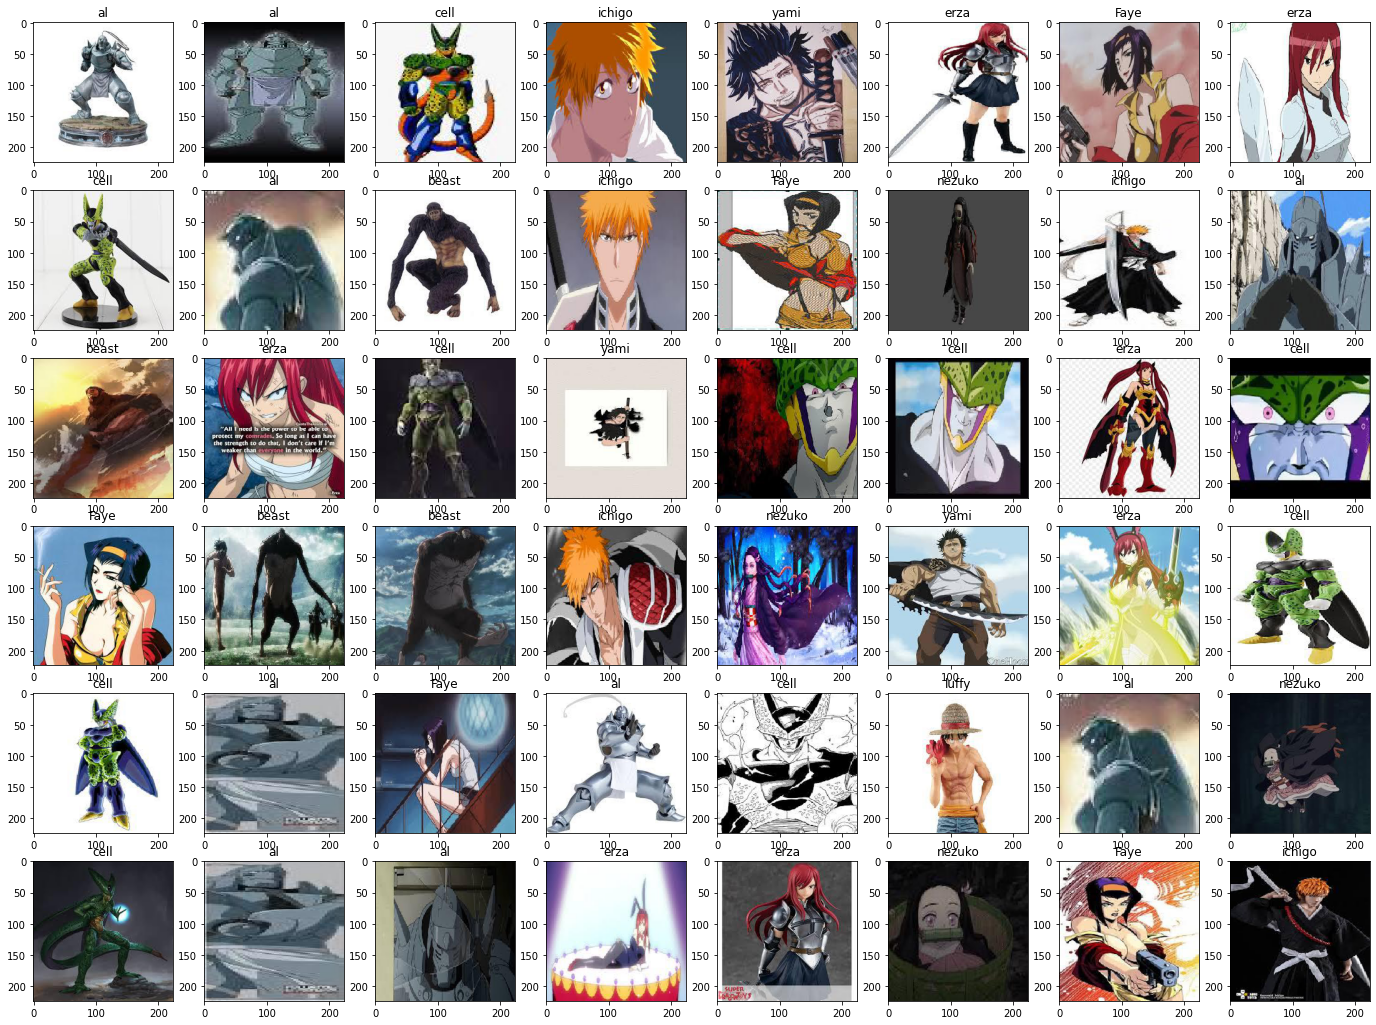

In [ ]:
image_plot(rows=6, batch=train_batches)

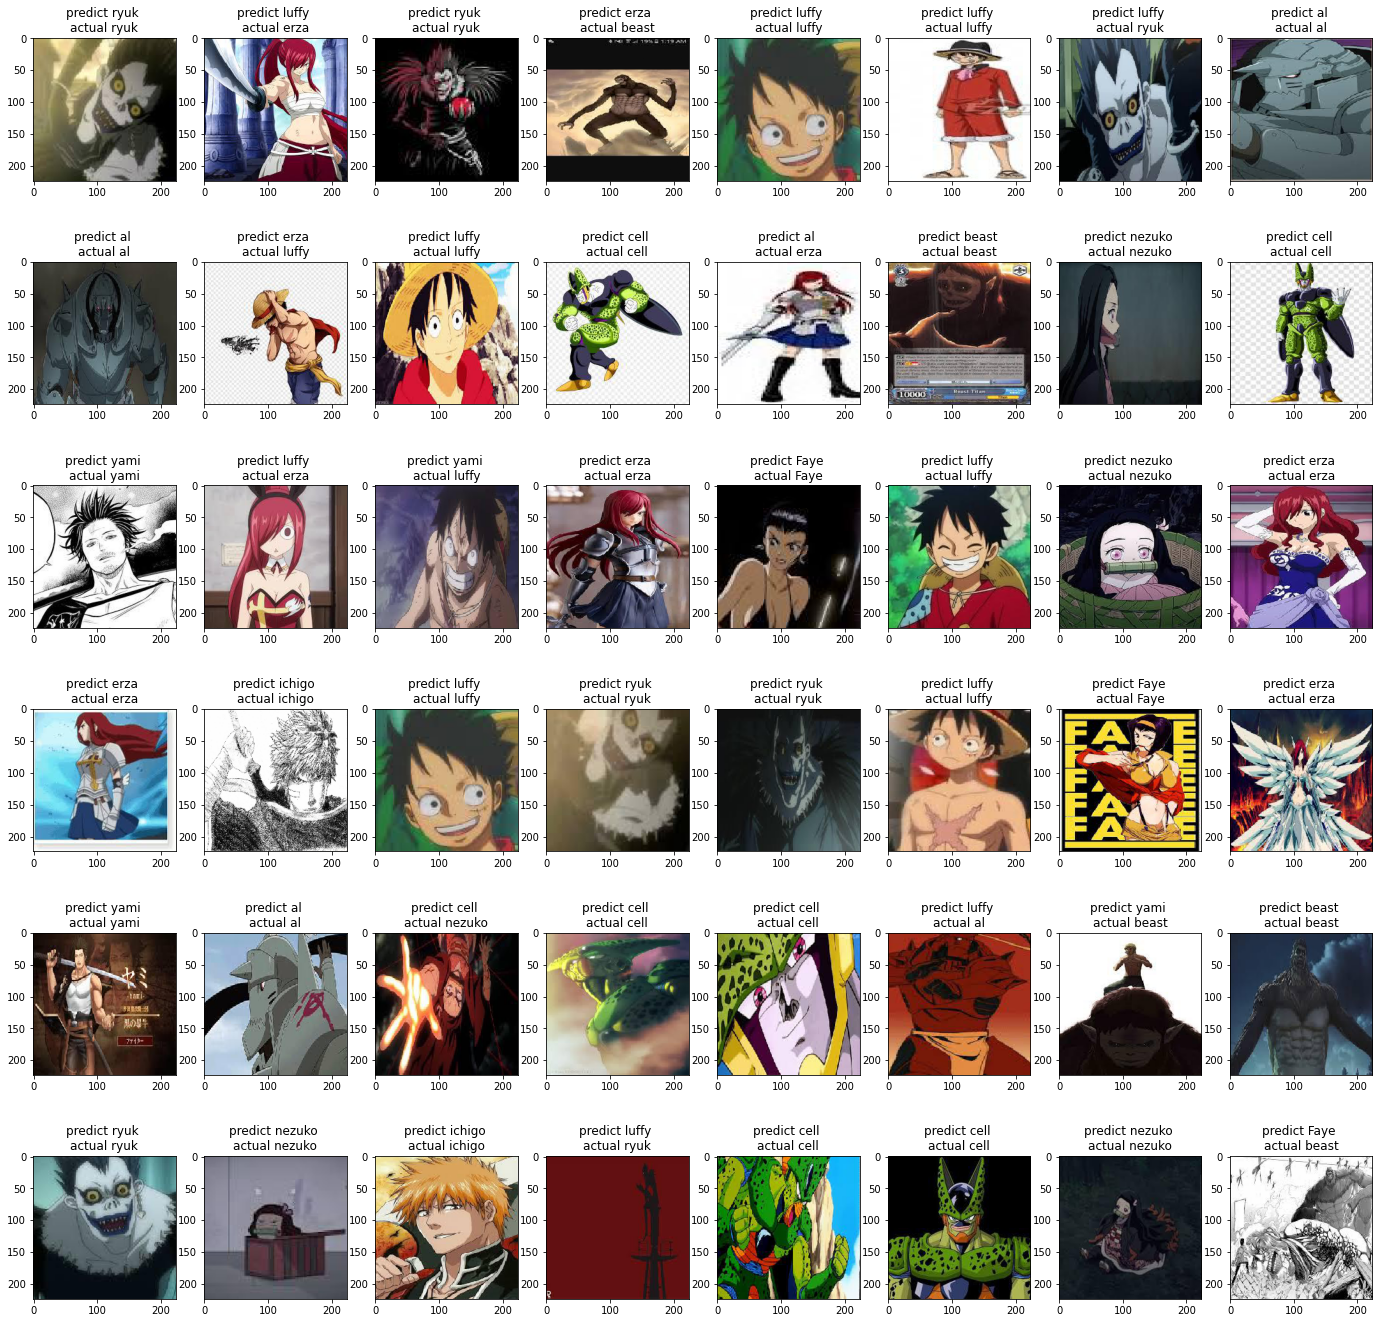

In [ ]:
image_plot_predict(rows=6, batch=test_batches, model=char_class)

# Test predictions

In [ ]:
pred, actual = result(test_batches, char_class)

# Confusion MAtrix & Heatmap

In [ ]:
mat = confusion_matrix(actual,pred, normalize= 'true')


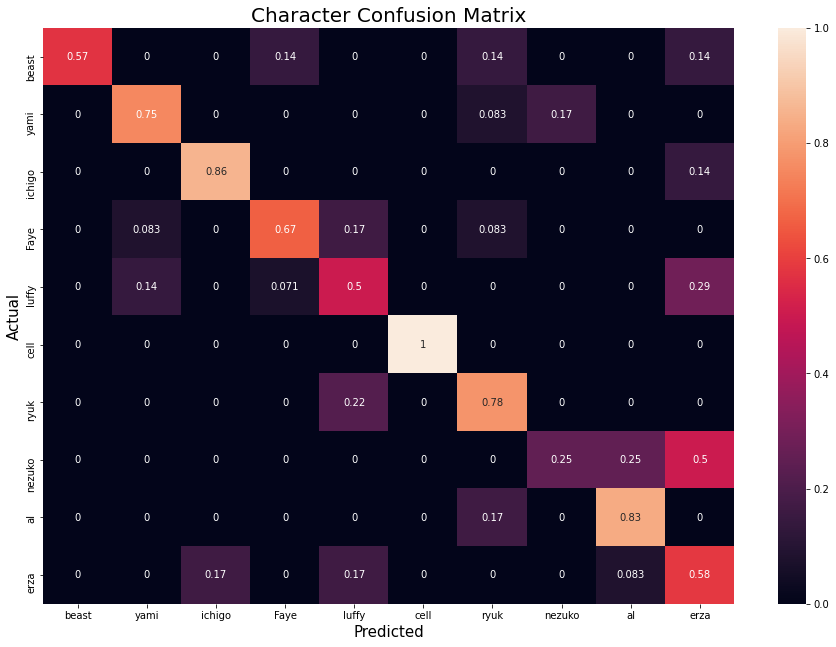

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(mat, annot=True,yticklabels=sub_class1,xticklabels=sub_class1)
ax.set_title('Character Confusion Matrix', size =20)
ax.set_ylabel('Actual', size =15)
ax.set_xlabel('Predicted', size =15)

plt.show()

# Incorrect Predictions

In [ ]:
wrong, ximages, correct = missed(test_batches,char_class,sub_class1)

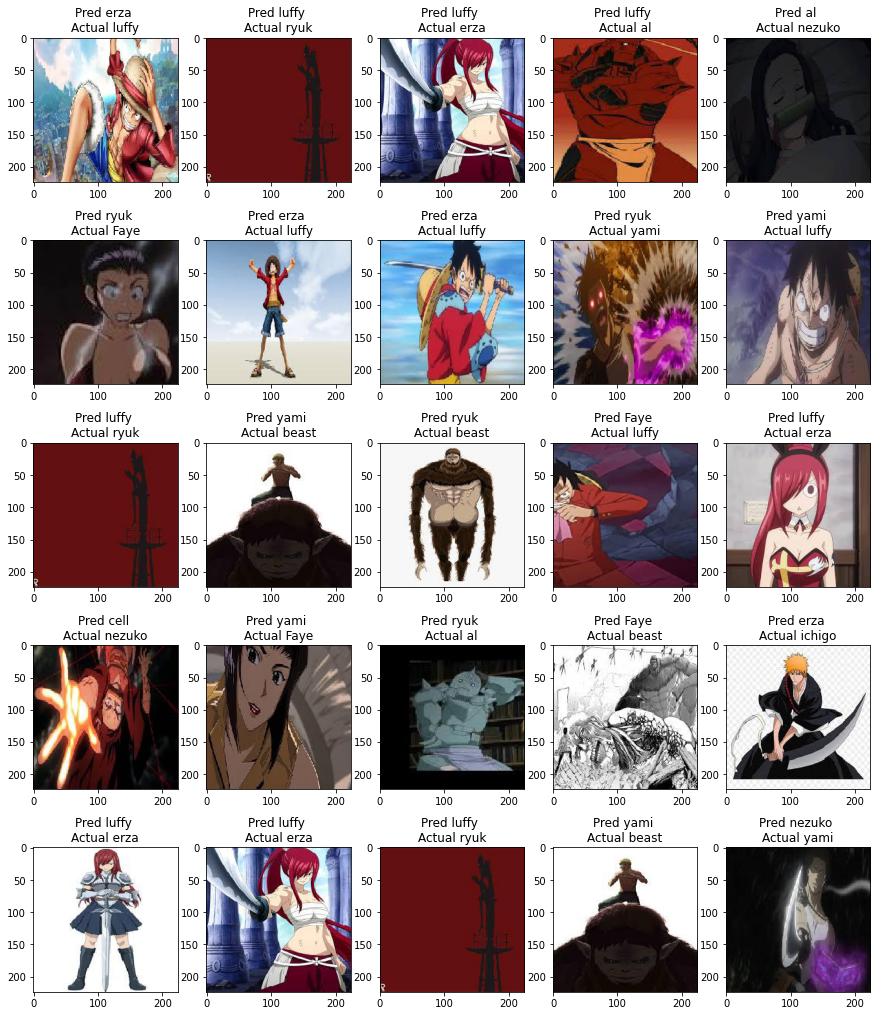

In [ ]:
ig, axs = plt.subplots(5, 5, figsize=(15, 18))
k = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(ximages[k]/255)
        title = f"Pred {wrong[k]} \nActual {correct[k]}"
        axs[i,j].set_title(title)
        k+=1

In [ ]:
class_report = classification_report(actual,pred, output_dict= True)

In [ ]:
pd.DataFrame(class_report).T

precision    recall  f1-score  support
0              1.000000  0.571429  0.727273      7.0
1              0.750000  0.750000  0.750000     12.0
2              0.857143  0.857143  0.857143     14.0
3              0.800000  0.666667  0.727273     12.0
4              0.538462  0.500000  0.518519     14.0
5              1.000000  1.000000  1.000000     10.0
6              0.636364  0.777778  0.700000      9.0
7              0.333333  0.250000  0.285714      4.0
8              0.714286  0.833333  0.769231      6.0
9              0.437500  0.583333  0.500000     12.0
accuracy       0.700000  0.700000  0.700000      0.7
macro avg      0.706709  0.678968  0.683515    100.0
weighted avg   0.717348  0.700000  0.701357    100.0